In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Load the data using read_csv

diwali_data = pd.read_csv("E:/Tasks/Python_Diwali_Sales_Analysis/Diwali Sales Data.csv", encoding= 'unicode_escape')
diwali_data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [3]:
# Check the shape of the data

diwali_data.shape

(11251, 15)

In [4]:
# Check the information of the data

diwali_data.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 6.2 MB


## DATA CLEANING

In [5]:
# Remove the empty columns from the data

diwali_data.drop(columns=['Status', 'unnamed1'], inplace= True)
diwali_data.sample()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
4165,1002186,Shubham,P00221842,F,18-25,24,1,Uttar Pradesh,Central,IT Sector,Electronics & Gadgets,1,10001.0


In [6]:
# Check for the Null values in the data

diwali_data.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [7]:
# Drop the null values bcs we have <1% of the null values 
diwali_data.dropna(inplace= True)

In [8]:
# Change the datatype of amount from float to integer

diwali_data['Amount'] = diwali_data['Amount'].astype('int')

In [9]:
diwali_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


In [10]:
# Columns present in the data

diwali_data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [11]:
# Check the basic statistics of the data

diwali_data.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


## Exploratory Data Analysis And Data Visualization

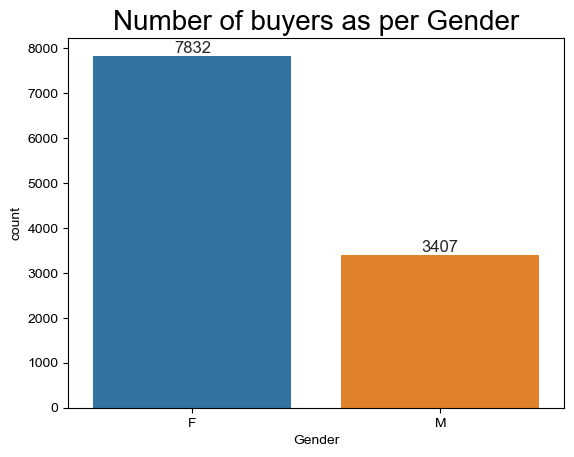

In [12]:
# Count the number of buyers as per the gender

ax = sns.countplot(data = diwali_data, x= 'Gender')

sns.set(rc = {'figure.figsize': (15,5)})

for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Number of buyers as per Gender", fontsize = 20)
plt.show()

There are more number of Female buyers compared to male.

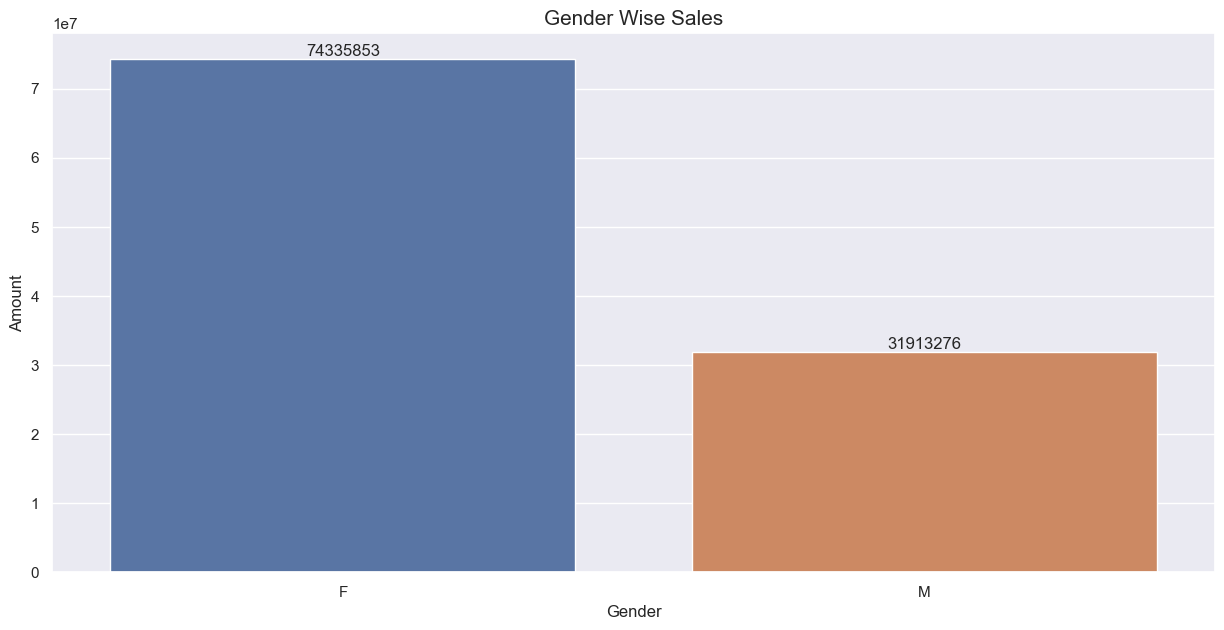

In [13]:
# Plot bar graph gender vs Total Amount

sales_by_gen = diwali_data.groupby('Gender', as_index= False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sales_by_gen

plt.figure(figsize=(15,7))
ax = sns.barplot(x="Gender", y = 'Amount', data = sales_by_gen)

for i in ax.containers:
    ax.bar_label(i, fmt= '%.0f')
    
plt.title("Gender Wise Sales", fontsize = 15)
plt.show()

Maximum number of sales is generated from female customers which is  Rs.74,335,853.

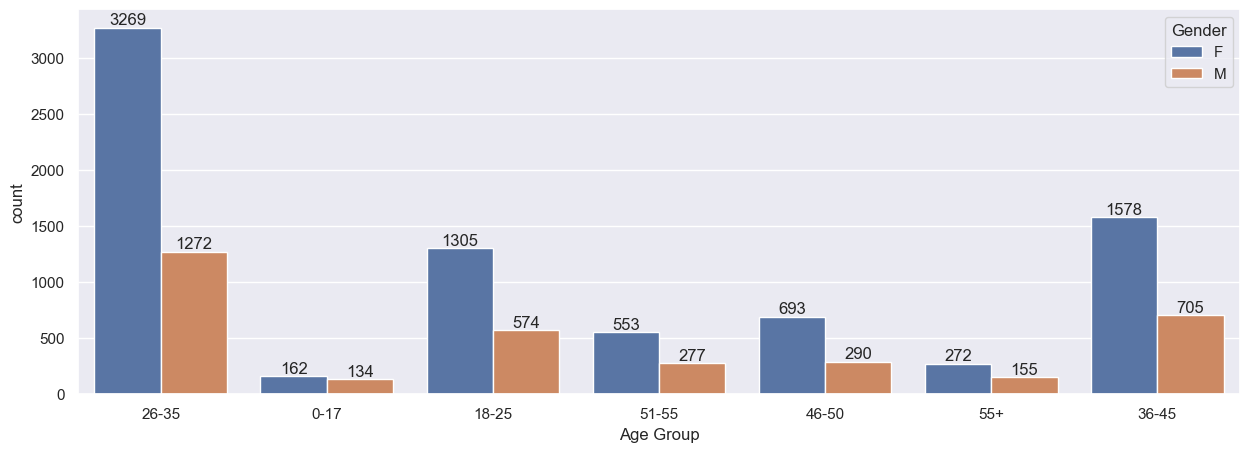

In [14]:
# Customer segmentation by age group

ax = sns.countplot(data = diwali_data, x = "Age Group", hue = "Gender")
for bar in ax.containers:
    ax.bar_label(bar)

Maximum number of customer are from the age group of 25-35, followed by 36-35 and majority of the customer are female.

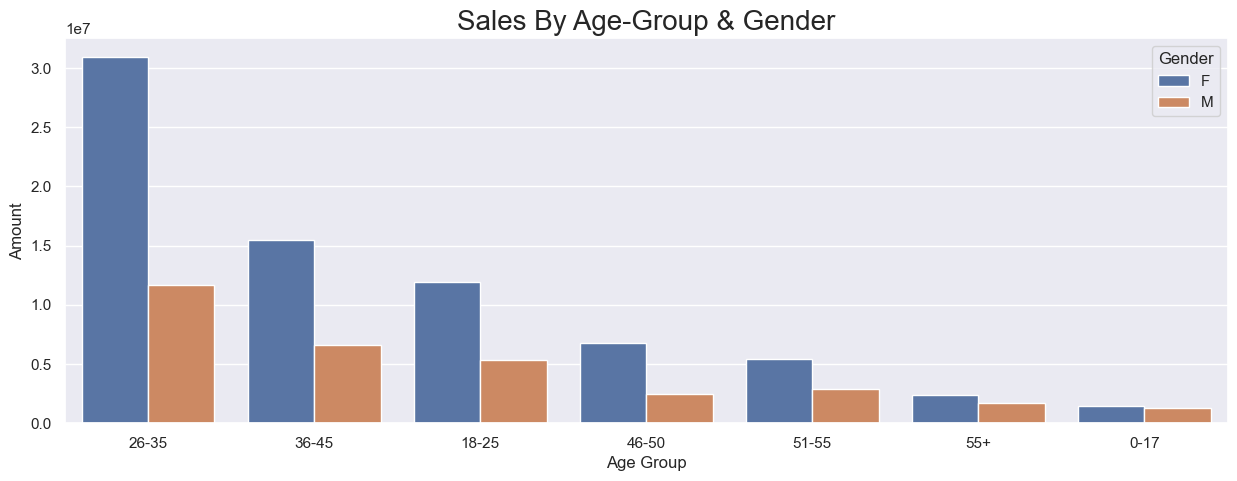

In [15]:
# Total amount vs age group

amt_by_ag = diwali_data.groupby(["Age Group","Gender"], as_index= False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(data = amt_by_ag, x= 'Age Group', y = 'Amount', hue = 'Gender')

plt.title("Sales By Age-Group & Gender", fontsize = 20)
plt.show()

Since the most number of customers are from the age between 26-45, hence the most sales have been from same age groups followed by the age group of 18-25.

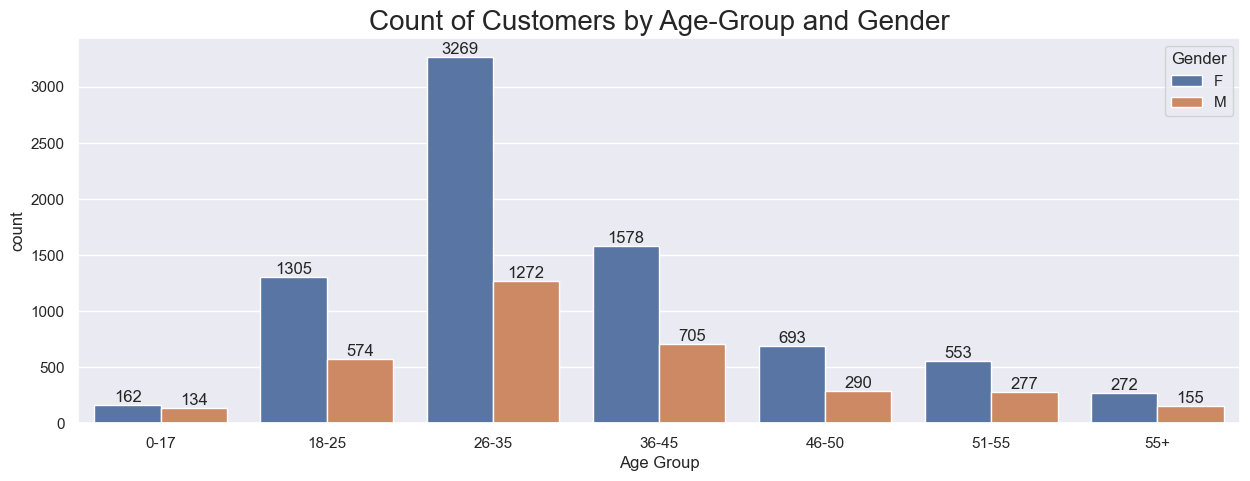

In [16]:
cnt_by_ag = diwali_data.groupby(['Gender', 'Age Group'], as_index= False)['Age Group'].value_counts()
ax = sns.barplot(data = cnt_by_ag, x= 'Age Group', y = 'count', hue = 'Gender')

for bar in ax.containers:
    ax.bar_label(bar)
plt.title("Count of Customers by Age-Group and Gender", fontsize = 20)
plt.show()

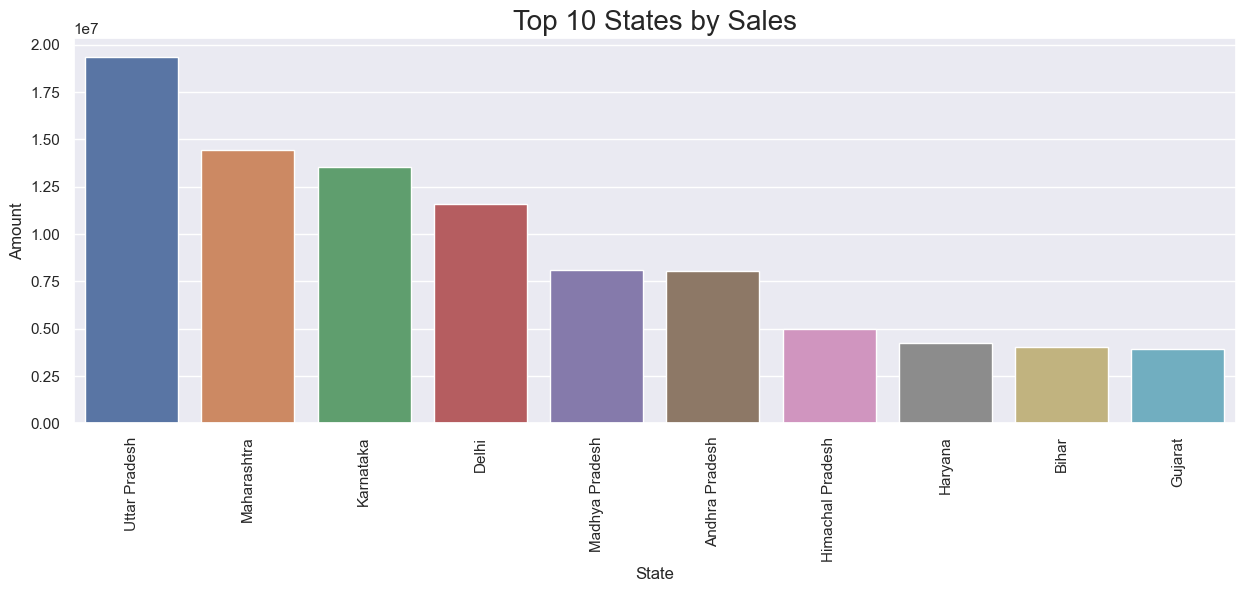

In [17]:
# total amount/sales from top 10 states

top_10_states = diwali_data.groupby("State", as_index= False)["Amount"].sum().sort_values(by = 'Amount', ascending = False).head(10)
top_10_states

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = top_10_states, x = 'State', y = 'Amount')
plt.title('Top 10 States by Sales', fontsize = 20)
plt.xlabel('State')
plt.ylabel('Amount')
plt.xticks(rotation = 90)
plt.show()

Uttar Pradesh, Maharashtra, and Karnataka had the highest sales followed by Delhi and Madhya Pradesh.

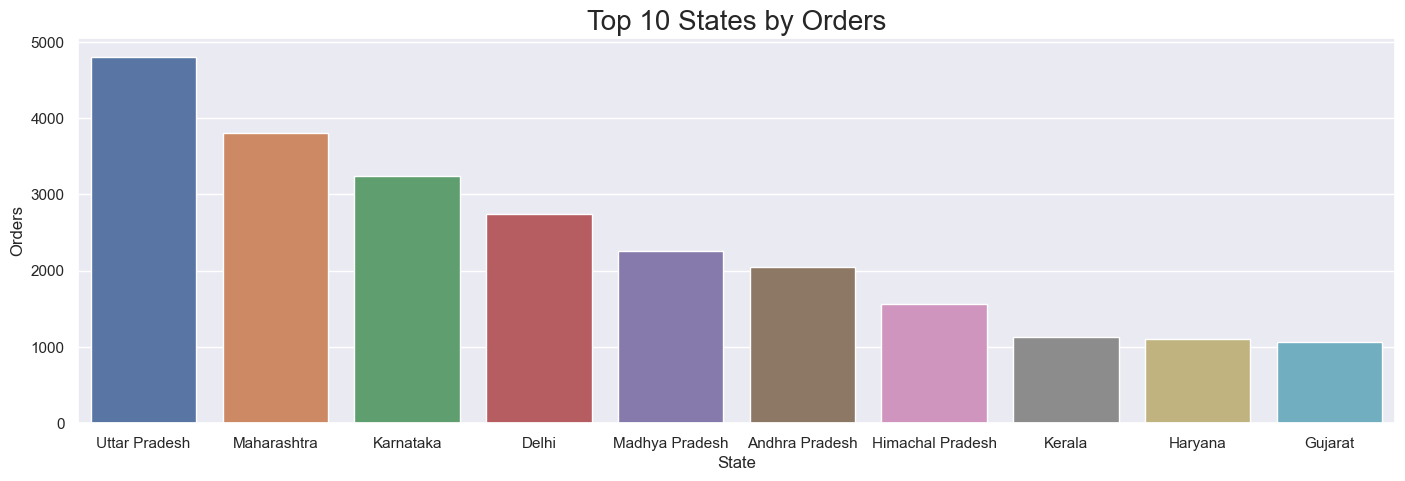

In [18]:
# total number of orders from top 10 states

top_10_states_by_order = diwali_data.groupby('State', as_index= False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

sns.set(rc={'figure.figsize' : (17,5)})
sns.barplot(data=top_10_states_by_order, x= 'State', y = 'Orders')

plt.title("Top 10 States by Orders", fontsize = 20)
plt.show()

In [19]:
# # Proportion of marital status

# sns.set(rc = {'figure.figsize': (8,5)})
# zx = sns.countplot(data= diwali_data, x= "Marital_Status")

# for bar in zx.containers:
#     zx.bar_label(bar)

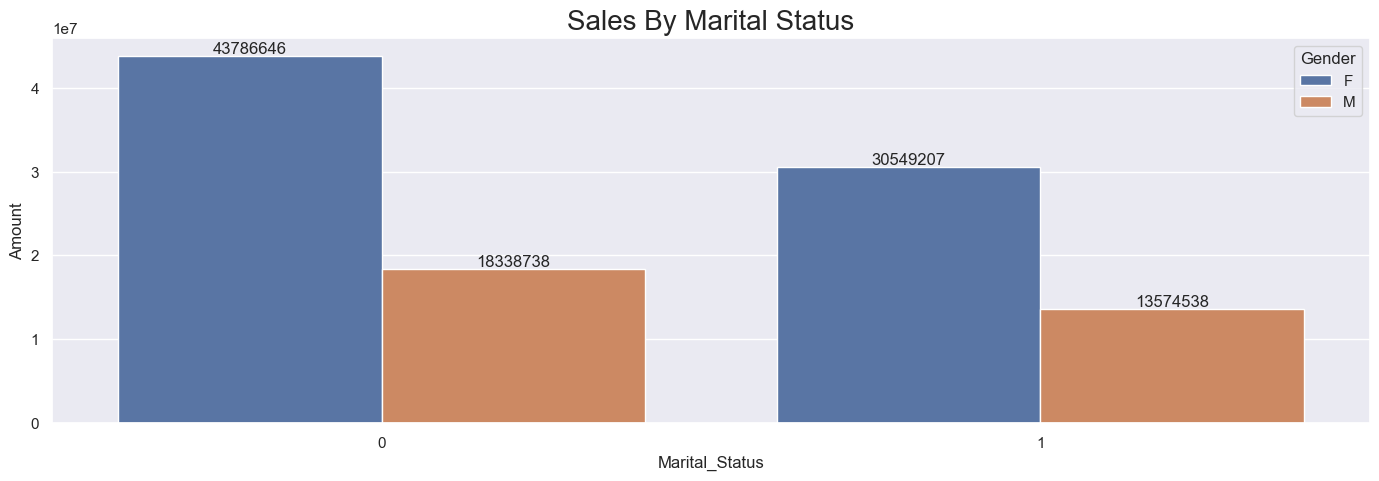

In [20]:
# Sales by marital_status and gender

sales_by_mar_sts = diwali_data.groupby(['Marital_Status', 'Gender'], as_index= False)['Amount'].sum().sort_values(by= 'Amount', ascending = False)

zx = sns.barplot(data = sales_by_mar_sts, x = 'Marital_Status', y = 'Amount', hue = 'Gender')

for bar in zx.containers:
    zx.bar_label(bar, fmt= '%.0f')

plt.title("Sales By Marital Status", fontsize = 20)
plt.show()

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

# Sales By Occupation

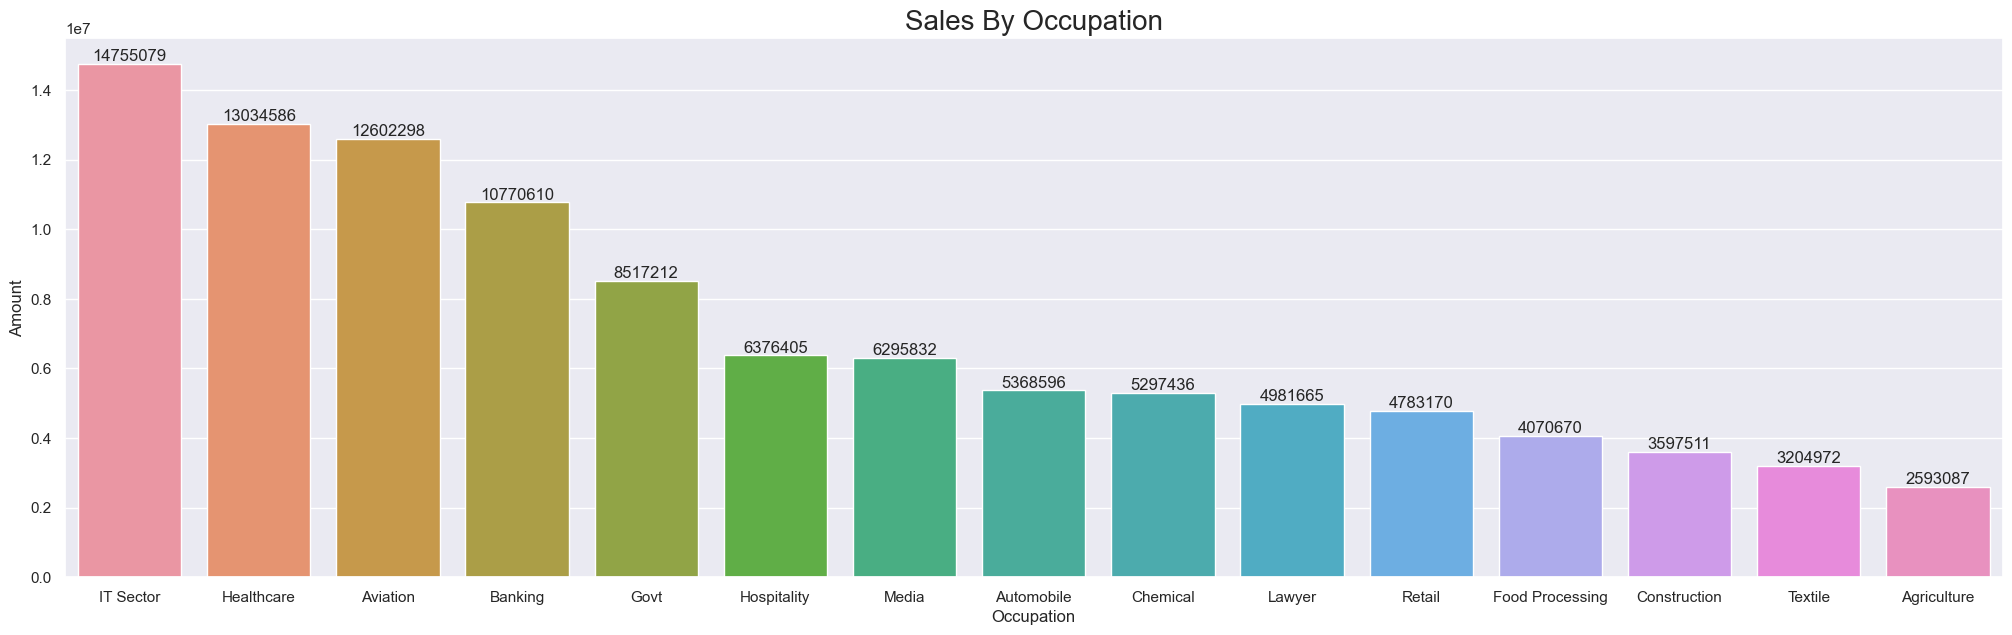

In [21]:
sales_by_occupation = diwali_data.groupby("Occupation",as_index= False)["Amount"].sum().sort_values(by= "Amount", ascending = False)

sns.set(rc = {"figure.figsize" : (25,7)})
ax = sns.barplot(data = sales_by_occupation, x = 'Occupation', y = 'Amount')

for bar in ax.containers:
    ax.bar_label(bar, fmt= '%.0f')
plt.title("Sales By Occupation", fontsize = 20)
plt.show()

*Most buyers are from IT Sector, Healthcare, Aviation and Banking  followed by Govt and they have high purchasing power*

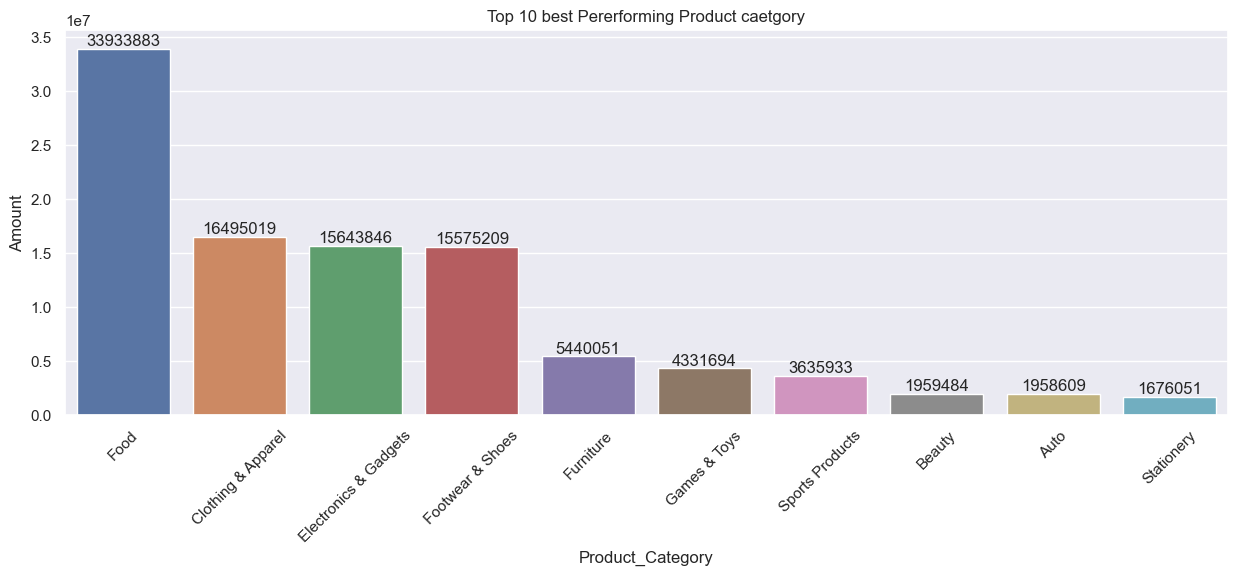

In [22]:
# Sales by Product Category
# Top 10 Product

top_10_pro_cat =diwali_data.groupby('Product_Category', as_index= False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.set(rc= {"figure.figsize" : (15,5)})
ax = sns.barplot(data = top_10_pro_cat, x = 'Product_Category', y = 'Amount')
for bar in ax.containers:
    ax.bar_label(bar, fmt= '%.0f')
plt.title("Top 10 best Pererforming Product caetgory")
plt.xticks(rotation = 45)
plt.show()

*Food was the most sold product category this diwali, followed by clothing & Apparel and Electronics & Gadgets*

## Which region has the highest number of orders and sales respectively?

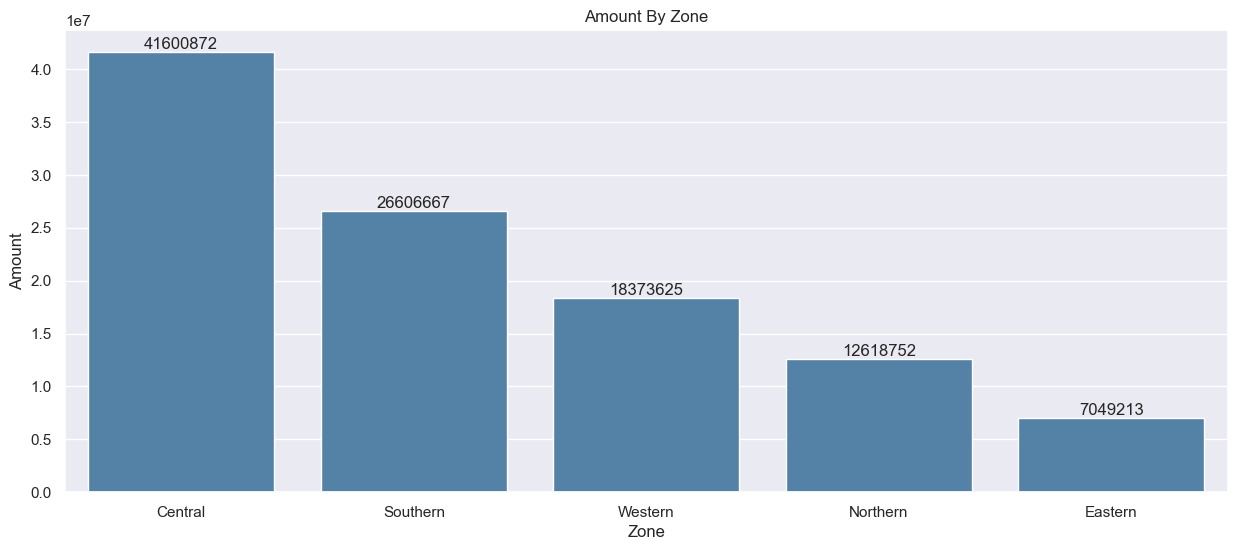

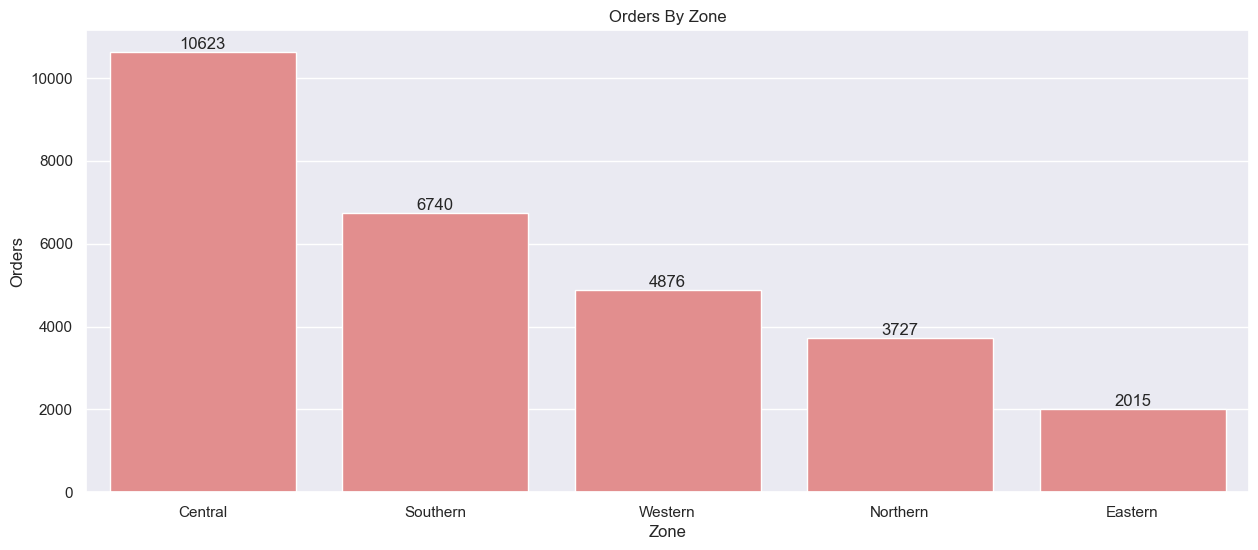

In [23]:
reg_sales_order = (diwali_data
                   .groupby('Zone', as_index= False)[["Orders", "Amount"]]
                   .sum()
                   .sort_values(by = 'Orders', ascending = False)
)
sns.set(rc = {"figure.figsize" : (15,6)})
ax = sns.barplot(data = reg_sales_order, x  = 'Zone', y = "Amount", color= 'steelblue')

for bar in ax.containers:
    ax.bar_label(bar, fmt= '%.0f')
plt.title('Amount By Zone')
plt.show()
    
    

bx = sns.barplot(data = reg_sales_order, x  = 'Zone', y = "Orders", color= 'lightcoral')

for bar in bx.containers:
    bx.bar_label(bar, fmt = '%.0f')
plt.title('Orders By Zone')
plt.show()

*Central Zone has highest number of orders and Sales i.e. people from central region did more purchase.*

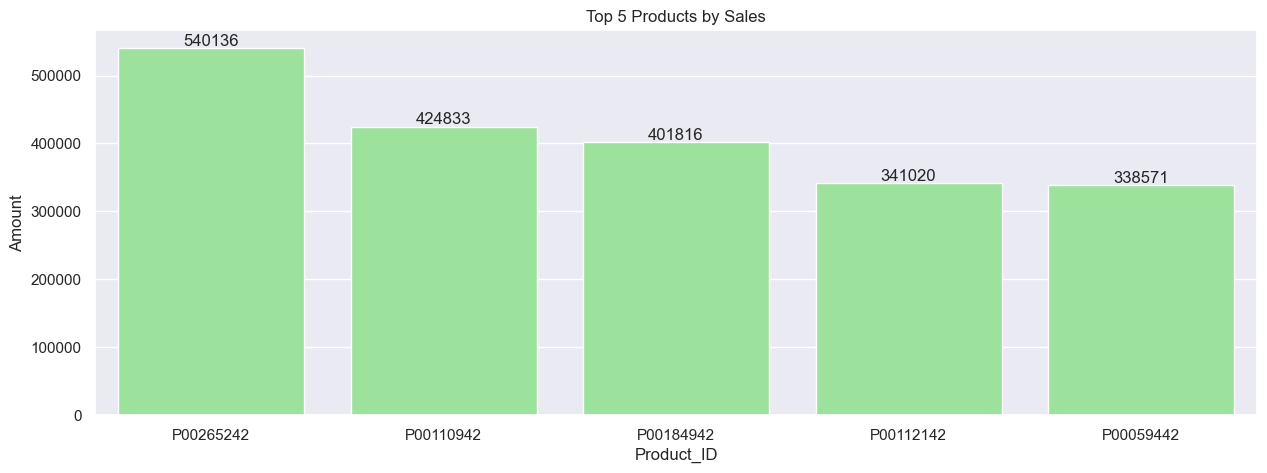

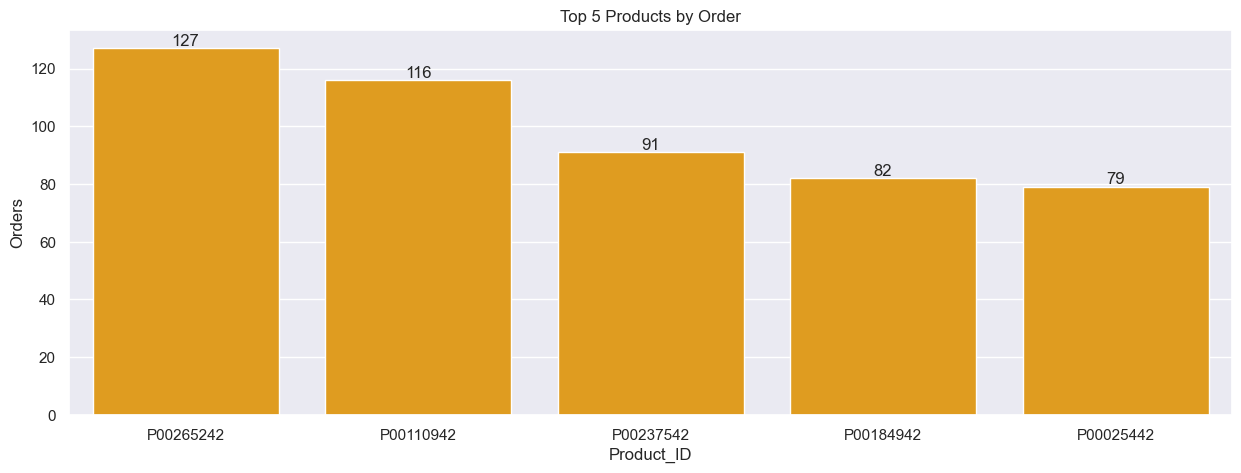

In [24]:
top_5_prodId = (diwali_data
               .groupby("Product_ID", as_index= False)["Amount"]
               .sum()
               .nlargest(5, 'Amount'))
top_5_prodId

sns.set(rc= {"figure.figsize" : (15,5)})
amt = sns.barplot(data = top_5_prodId, x= 'Product_ID', y = 'Amount', color = 'lightgreen')

for bar in amt.containers:
    amt.bar_label(bar)

plt.title("Top 5 Products by Sales")
plt.show()
    
top_5_ord_prodId = (diwali_data
               .groupby("Product_ID", as_index= False)["Orders"]
               .sum()
               .nlargest(5, 'Orders'))
top_5_ord_prodId

sns.set(rc= {"figure.figsize" : (15,5)})
ords = sns.barplot(data = top_5_ord_prodId, x= 'Product_ID', y = 'Orders', color = 'Orange')

for bar in ords.containers:
    ords.bar_label(bar)
plt.title("Top 5 Products by Order")
plt.show()

*Product_ID 'P00265242' is ordered 127 times which is the highest, followed by 'P00110942'.*
*Similarly the sales of these are Product_IDs are high respectively.*

In [25]:
corr_matrix = diwali_data.corr(numeric_only= True)
corr_matrix

,User_ID,Age,Marital_Status,Orders,Amount
User_ID,1.000000,0.022338,0.004345,-0.016022,-0.011997
Age,0.022338,1.000000,-0.012344,0.008090,0.030941
Marital_Status,0.004345,-0.012344,1.000000,-0.003487,-0.017493
Orders,-0.016022,0.008090,-0.003487,1.000000,-0.013184
Amount,-0.011997,0.030941,-0.017493,-0.013184,1.000000
